In [1]:

# Load our data:
mvt = read.csv("mvt.csv", stringsAsFactors=FALSE)

str(mvt)


'data.frame':	191641 obs. of  3 variables:
 $ Date     : chr  "12/31/12 23:15" "12/31/12 22:00" "12/31/12 22:00" "12/31/12 22:00" ...
 $ Latitude : num  41.8 41.9 42 41.8 41.8 ...
 $ Longitude: num  -87.6 -87.7 -87.8 -87.7 -87.6 ...


In [2]:
# Convert the Date variable to a format that R will recognize:
mvt$Date = strptime(mvt$Date, format="%m/%d/%y %H:%M")

# Extract the hour and the day of the week:
mvt$Weekday = weekdays(mvt$Date)
mvt$Hour = mvt$Date$hour

# Let's take a look at the structure of our data again:
str(mvt)


'data.frame':	191641 obs. of  5 variables:
 $ Date     : POSIXlt, format: "2012-12-31 23:15:00" "2012-12-31 22:00:00" ...
 $ Latitude : num  41.8 41.9 42 41.8 41.8 ...
 $ Longitude: num  -87.6 -87.7 -87.8 -87.7 -87.6 ...
 $ Weekday  : chr  "Monday" "Monday" "Monday" "Monday" ...
 $ Hour     : int  23 22 22 22 21 20 20 20 19 18 ...


In [3]:
# Create a simple line plot - need the total number of crimes on each day of the week. We can get this information by creating a table:
table(mvt$Weekday)



   Friday    Monday  Saturday    Sunday  Thursday   Tuesday Wednesday 
    29284     27397     27118     26316     27319     26791     27416 

In [4]:
# Save this table as a data frame:
WeekdayCounts = as.data.frame(table(mvt$Weekday))

str(WeekdayCounts) 

'data.frame':	7 obs. of  2 variables:
 $ Var1: Factor w/ 7 levels "Friday","Monday",..: 1 2 3 4 5 6 7
 $ Freq: int  29284 27397 27118 26316 27319 26791 27416


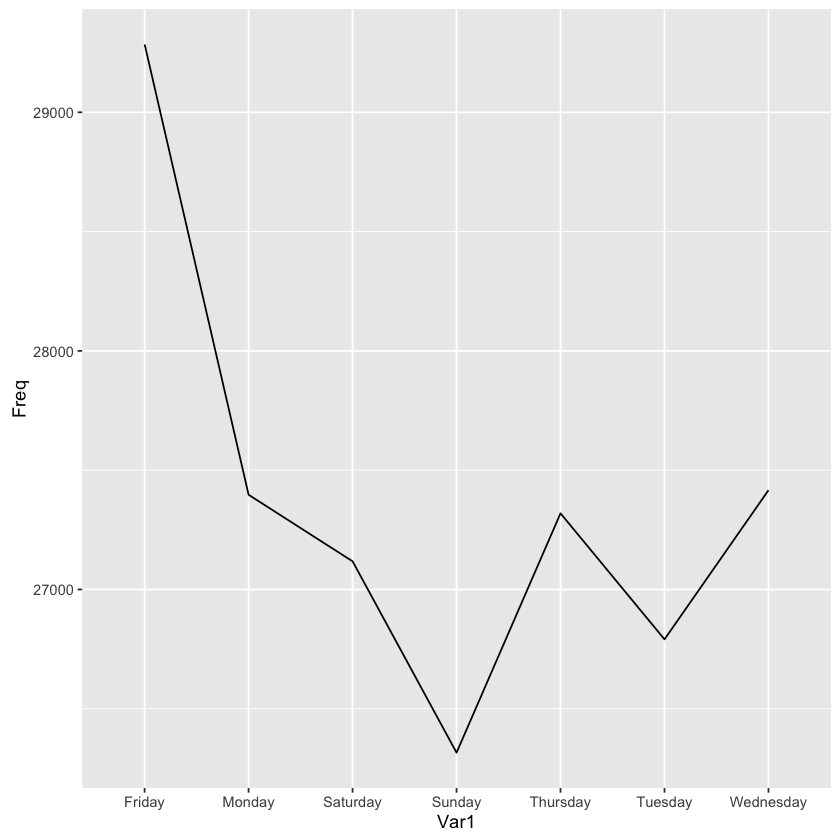

In [5]:
# Load the ggplot2 library:
library(ggplot2)

# Create our plot
ggplot(WeekdayCounts, aes(x=Var1, y=Freq)) + geom_line(aes(group=1))  


In [6]:

# Make the "Var1" variable an ORDERED factor variable
WeekdayCounts$Var1 = factor(WeekdayCounts$Var1, ordered=TRUE, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday","Saturday"))


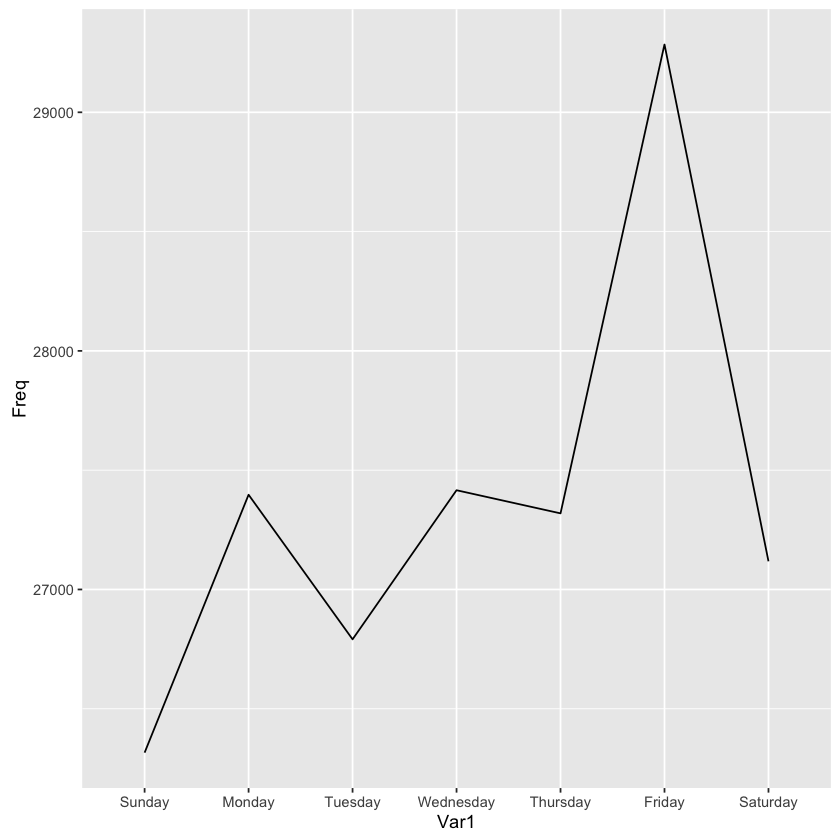

In [7]:
# Try again:
ggplot(WeekdayCounts, aes(x=Var1, y=Freq)) + geom_line(aes(group=1))


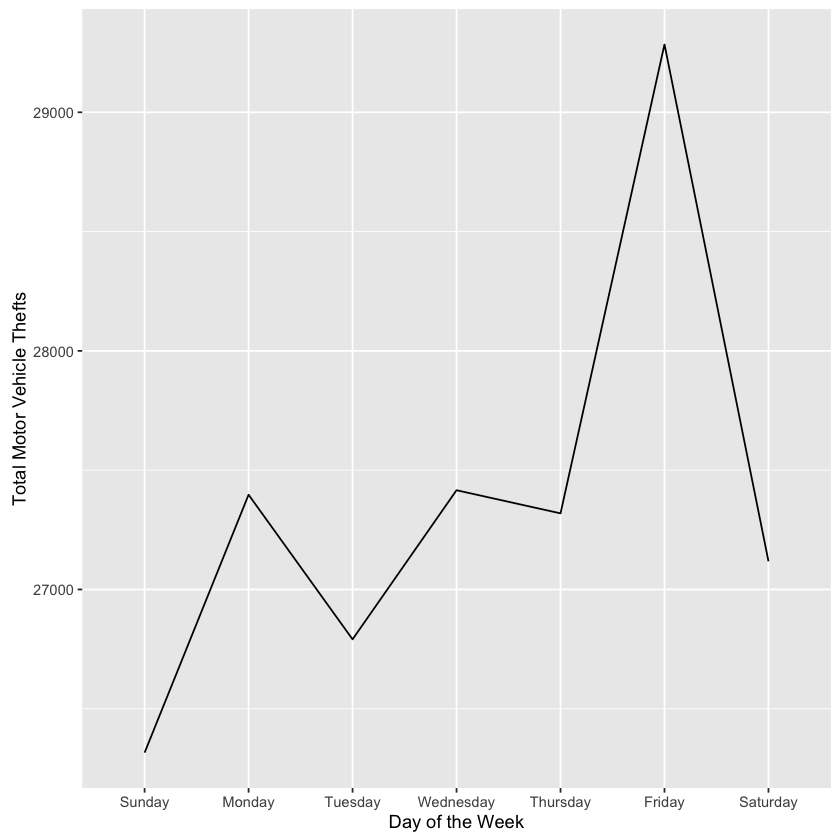

In [8]:

# Change our x and y labels:
ggplot(WeekdayCounts, aes(x=Var1, y=Freq)) + geom_line(aes(group=1)) + xlab("Day of the Week") + ylab("Total Motor Vehicle Thefts")


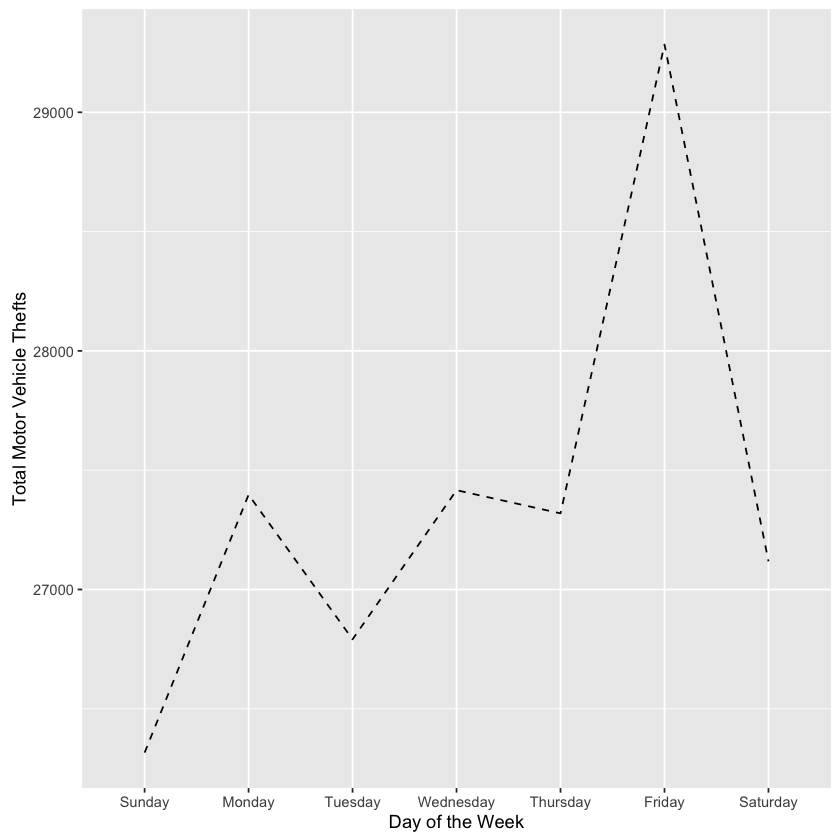

In [9]:

# Change our x and y labels:
ggplot(WeekdayCounts, aes(x=Var1, y=Freq)) + geom_line(aes(group=1), linetype=2) + xlab("Day of the Week") + ylab("Total Motor Vehicle Thefts")


In [10]:
# Create a counts table for the weekday and hour:
table(mvt$Weekday, mvt$Hour)

# Save this to a data frame:
DayHourCounts = as.data.frame(table(mvt$Weekday, mvt$Hour))

str(DayHourCounts)

           
               0    1    2    3    4    5    6    7    8    9   10   11   12
  Friday    1873  932  743  560  473  602  839 1203 1268 1286  938  822 1207
  Monday    1900  825  712  527  415  542  772 1123 1323 1235  971  737 1129
  Saturday  2050 1267  985  836  652  508  541  650  858 1039  946  789 1204
  Sunday    2028 1236 1019  838  607  461  478  483  615  864  884  787 1192
  Thursday  1856  816  696  508  400  534  799 1135 1298 1301  932  731 1093
  Tuesday   1691  777  603  464  414  520  845 1118 1175 1174  948  786 1108
  Wednesday 1814  790  619  469  396  561  862 1140 1329 1237  947  763 1225
           
              13   14   15   16   17   18   19   20   21   22   23
  Friday     857  937 1140 1165 1318 1623 1652 1736 1881 2308 1921
  Monday     824  958 1059 1136 1252 1518 1503 1622 1815 2009 1490
  Saturday   767  963 1086 1055 1084 1348 1390 1570 1702 2078 1750
  Sunday     789  959 1037 1083 1160 1389 1342 1706 1696 2079 1584
  Thursday   752  831 104

'data.frame':	168 obs. of  3 variables:
 $ Var1: Factor w/ 7 levels "Friday","Monday",..: 1 2 3 4 5 6 7 1 2 3 ...
 $ Var2: Factor w/ 24 levels "0","1","2","3",..: 1 1 1 1 1 1 1 2 2 2 ...
 $ Freq: int  1873 1900 2050 2028 1856 1691 1814 932 825 1267 ...


In [11]:
# Convert the second variable, Var2, to numbers and call it Hour:
DayHourCounts$Hour = as.numeric(as.character(DayHourCounts$Var2))


In [12]:
# Create out plot:
ggplot(DayHourCounts, aes(x=Hour, y=Freq)) + geom_line(aes(group=Var1))


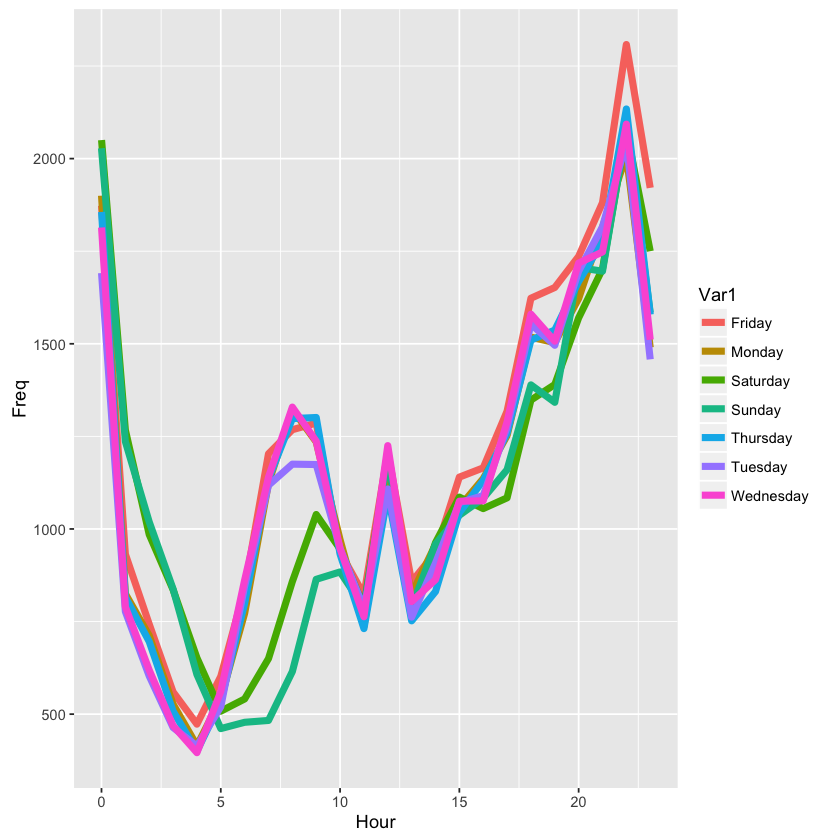

In [13]:
# Change the colors
ggplot(DayHourCounts, aes(x=Hour, y=Freq)) + geom_line(aes(group=Var1, color=Var1), size=2)


In [14]:
# Separate the weekends from the weekdays:
DayHourCounts$Type = ifelse((DayHourCounts$Var1 == "Sunday") | (DayHourCounts$Var1 == "Saturday"), "Weekend", "Weekday")


In [15]:
# Redo our plot, this time coloring by Type:
ggplot(DayHourCounts, aes(x=Hour, y=Freq)) + geom_line(aes(group=Var1, color=Type), size=2) 
  


In [16]:
# Make the lines a little transparent:
ggplot(DayHourCounts, aes(x=Hour, y=Freq)) + geom_line(aes(group=Var1, color=Type), size=2, alpha=0.5) 


In [17]:
# Fix the order of the days:
DayHourCounts$Var1 = factor(DayHourCounts$Var1, ordered=TRUE, levels=c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))


In [18]:
# Make a heatmap:
ggplot(DayHourCounts, aes(x = Hour, y = Var1)) + geom_tile(aes(fill = Freq))


In [ ]:
install.packages('ggmap', repos="http://cran.stat.ucla.edu/")

In [19]:
library(maps)

# Load the ggplot2 library:
library(ggplot2)

library(ggmap)


 # ATTENTION: maps v3.0 has an updated 'world' map.        #
 # Many country borders and names have changed since 1990. #
 # Type '?world' or 'news(package="maps")'. See README_v3. #




In [20]:
# Load a map of Chicago into R:
chicago = get_map(location = "chicago", zoom = 11)


Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=chicago&zoom=11&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=chicago&sensor=false


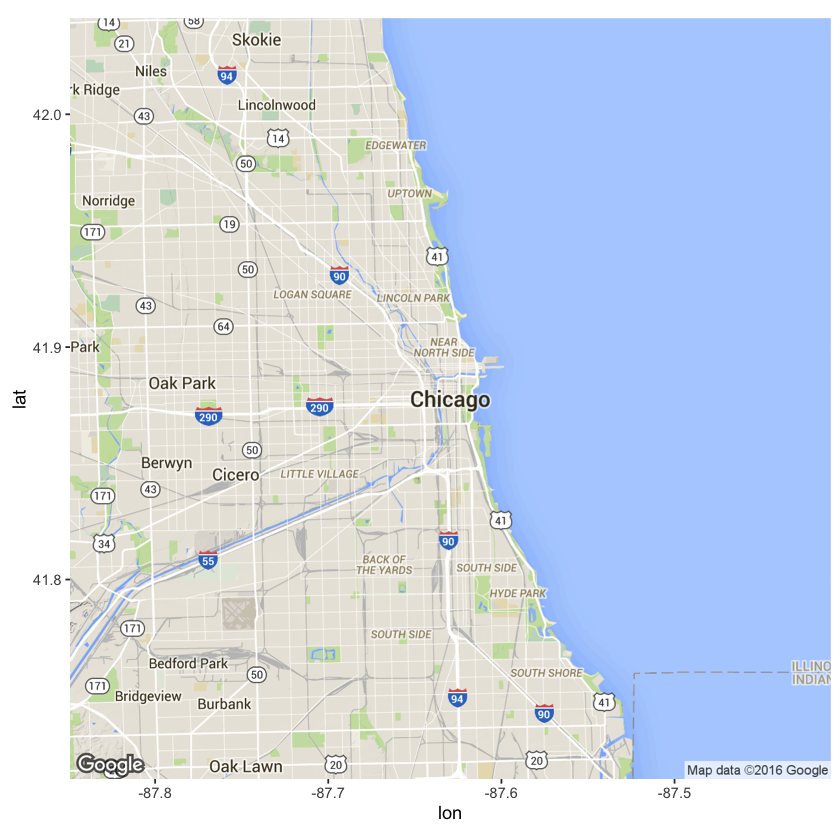

In [21]:

# Look at the map
ggmap(chicago)

In [22]:
# Plot the first 100 motor vehicle thefts:
ggmap(chicago) + geom_point(data = mvt[1:100,], aes(x = Longitude, y = Latitude))


Warning message:
: Removed 7 rows containing missing values (geom_point).

In [23]:
# Round our latitude and longitude to 2 digits of accuracy, and create a crime counts data frame for each area:
LatLonCounts = as.data.frame(table(round(mvt$Longitude,2), round(mvt$Latitude,2)))


In [24]:

str(LatLonCounts)

# Convert our Longitude and Latitude variable to numbers:
LatLonCounts$Long = as.numeric(as.character(LatLonCounts$Var1))
LatLonCounts$Lat = as.numeric(as.character(LatLonCounts$Var2))

# Plot these points on our map:
ggmap(chicago) + geom_point(data = LatLonCounts, aes(x = Long, y = Lat, color = Freq, size=Freq))


'data.frame':	1638 obs. of  3 variables:
 $ Var1: Factor w/ 42 levels "-87.93","-87.92",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Var2: Factor w/ 39 levels "41.64","41.65",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Freq: int  0 0 0 0 0 0 0 0 0 0 ...


Warning message:
: Removed 615 rows containing missing values (geom_point).

Warning message:
: Removed 615 rows containing missing values (geom_point).

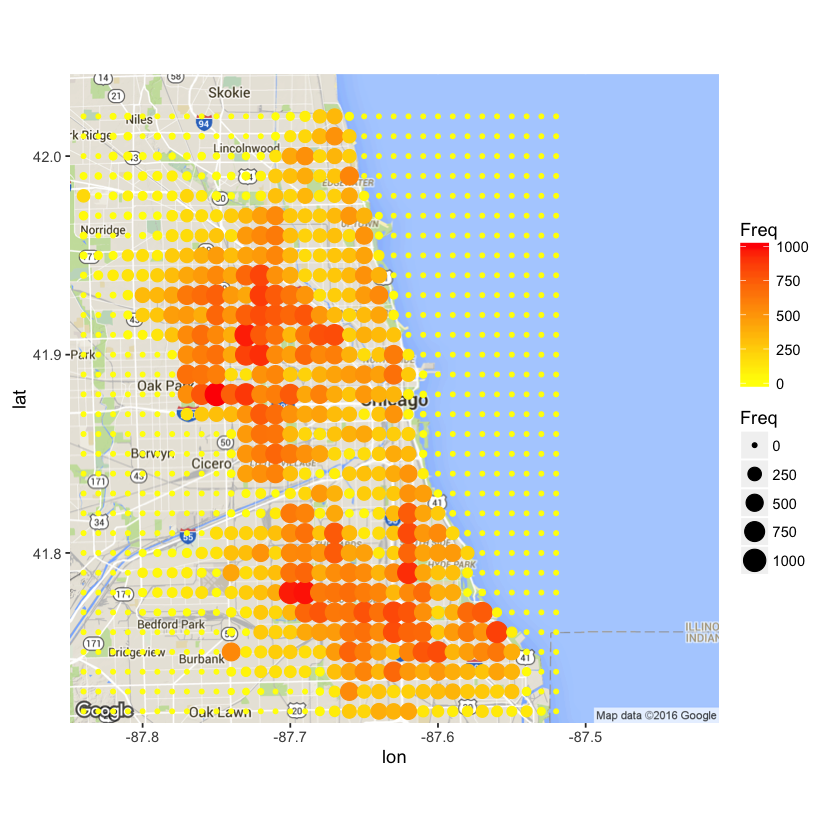

In [25]:
# Change the color scheme:
ggmap(chicago) + geom_point(data = LatLonCounts, aes(x = Long, y = Lat, color = Freq, size=Freq)) + scale_colour_gradient(low="yellow", high="red")


In [26]:

# We can also use the geom_tile geometry
ggmap(chicago) + geom_tile(data = LatLonCounts, aes(x = Long, y = Lat, alpha = Freq), fill="red")



Warning message:
: Removed 615 rows containing missing values (geom_tile).

In [33]:

LatLonCounts2 = subset(LatLonCounts, Freq > 0)

In [34]:
str(LatLonCounts2)

'data.frame':	686 obs. of  5 variables:
 $ Var1: Factor w/ 42 levels "-87.93","-87.92",..: 33 40 32 33 34 35 38 39 40 41 ...
 $ Var2: Factor w/ 39 levels "41.64","41.65",..: 1 1 2 2 2 2 2 2 2 2 ...
 $ Freq: int  3 1 54 60 28 1 8 63 81 8 ...
 $ Long: num  -87.6 -87.5 -87.6 -87.6 -87.6 ...
 $ Lat : num  41.6 41.6 41.6 41.6 41.6 ...


In [32]:
str(LatLonCounts)

'data.frame':	1638 obs. of  5 variables:
 $ Var1: Factor w/ 42 levels "-87.93","-87.92",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Var2: Factor w/ 39 levels "41.64","41.65",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Freq: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Long: num  -87.9 -87.9 -87.9 -87.9 -87.9 ...
 $ Lat : num  41.6 41.6 41.6 41.6 41.6 ...


In [35]:
1638-686

[1] 952

In [36]:
# Load our data:
murders = read.csv("murders.csv")

str(murders)


'data.frame':	51 obs. of  6 variables:
 $ State            : Factor w/ 51 levels "Alabama","Alaska",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Population       : int  4779736 710231 6392017 2915918 37253956 5029196 3574097 897934 601723 19687653 ...
 $ PopulationDensity: num  94.65 1.26 57.05 56.43 244.2 ...
 $ Murders          : int  199 31 352 130 1811 117 131 48 131 987 ...
 $ GunMurders       : int  135 19 232 93 1257 65 97 38 99 669 ...
 $ GunOwnership     : num  0.517 0.578 0.311 0.553 0.213 0.347 0.167 0.255 0.036 0.245 ...


In [37]:
# Load the map of the US
statesMap = map_data("state")

str(statesMap)


'data.frame':	15537 obs. of  6 variables:
 $ long     : num  -87.5 -87.5 -87.5 -87.5 -87.6 ...
 $ lat      : num  30.4 30.4 30.4 30.3 30.3 ...
 $ group    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ region   : chr  "alabama" "alabama" "alabama" "alabama" ...
 $ subregion: chr  NA NA NA NA ...


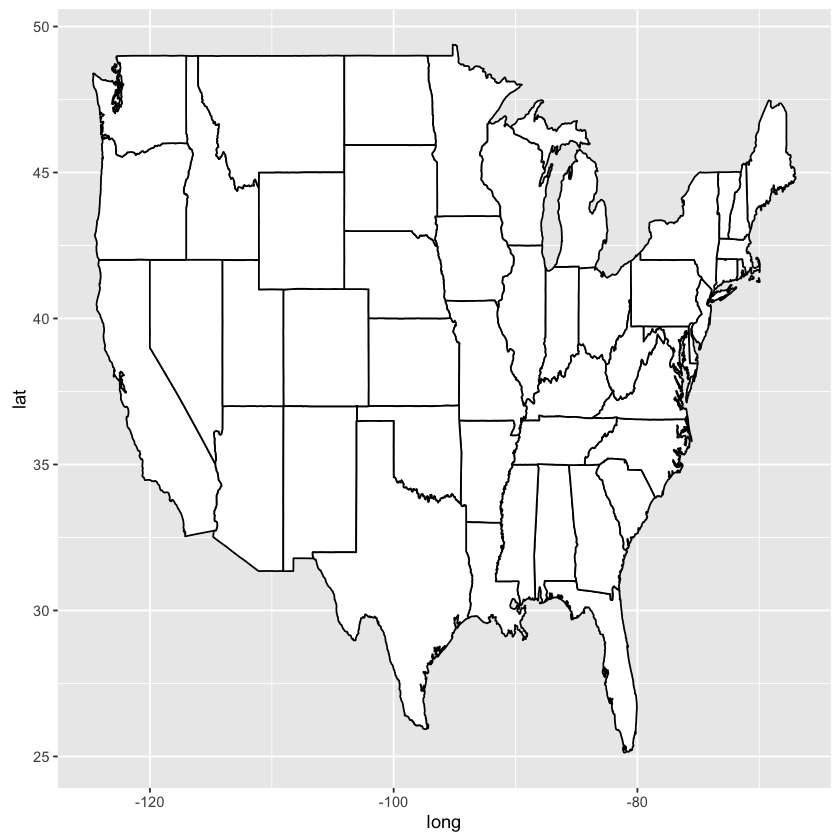

In [38]:
# Plot the map:
ggplot(statesMap, aes(x = long, y = lat, group = group)) + geom_polygon(fill = "white", color = "black") 


In [39]:
# Create a new variable called region with the lowercase names to match the statesMap:
murders$region = tolower(murders$State)

# Join the statesMap data and the murders data into one dataframe:
murderMap = merge(statesMap, murders, by="region")
str(murderMap)


'data.frame':	15537 obs. of  12 variables:
 $ region           : chr  "alabama" "alabama" "alabama" "alabama" ...
 $ long             : num  -87.5 -87.5 -87.5 -87.5 -87.6 ...
 $ lat              : num  30.4 30.4 30.4 30.3 30.3 ...
 $ group            : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ subregion        : chr  NA NA NA NA ...
 $ State            : Factor w/ 51 levels "Alabama","Alaska",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Population       : int  4779736 4779736 4779736 4779736 4779736 4779736 4779736 4779736 4779736 4779736 ...
 $ PopulationDensity: num  94.7 94.7 94.7 94.7 94.7 ...
 $ Murders          : int  199 199 199 199 199 199 199 199 199 199 ...
 $ GunMurders       : int  135 135 135 135 135 135 135 135 135 135 ...
 $ GunOwnership     : num  0.517 0.517 0.517 0.517 0.517 0.517 0.517 0.517 0.517 0.517 ...


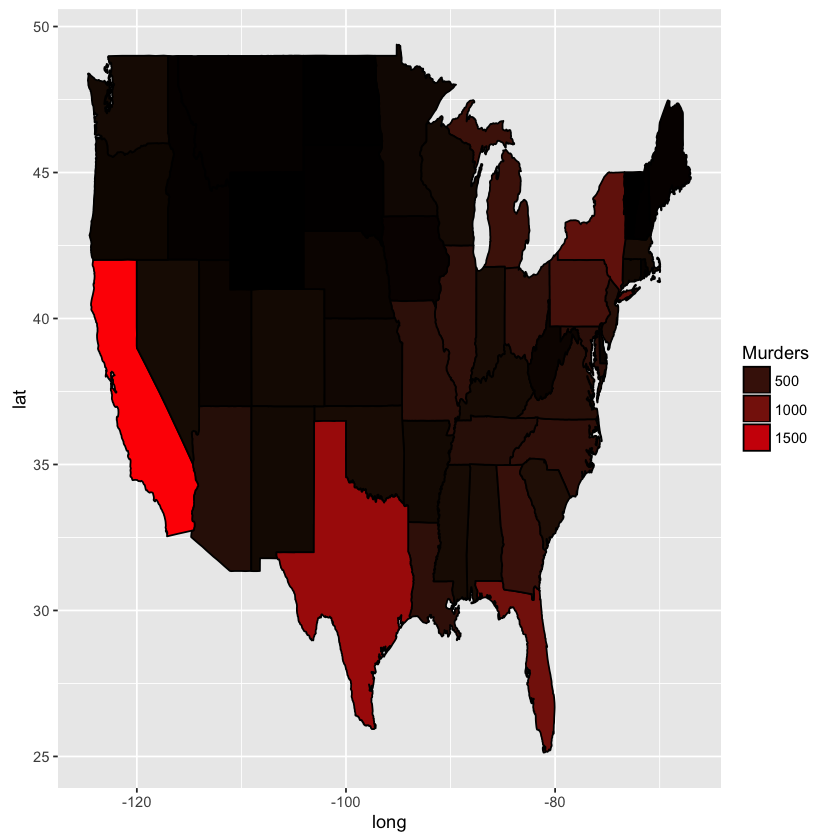

In [40]:
# Plot the number of murder on our map of the United States:
ggplot(murderMap, aes(x = long, y = lat, group = group, fill = Murders)) + geom_polygon(color = "black") + scale_fill_gradient(low = "black", high = "red", guide = "legend")


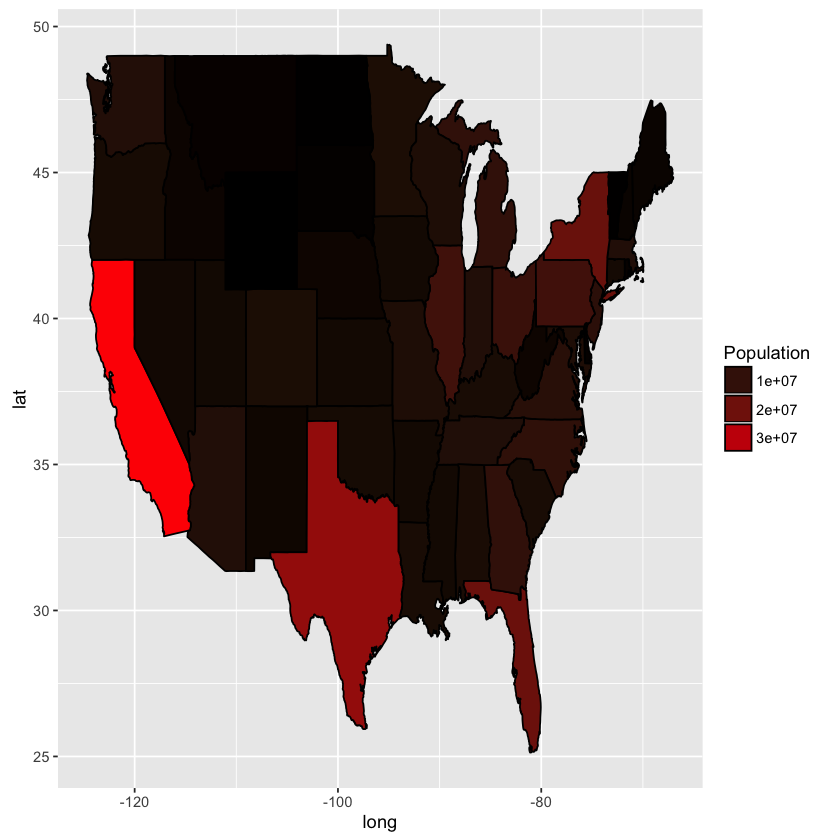

In [41]:
# Plot a map of the population:
ggplot(murderMap, aes(x = long, y = lat, group = group, fill = Population)) + geom_polygon(color = "black") + scale_fill_gradient(low = "black", high = "red", guide = "legend")


In [42]:

# Create a new variable that is the number of murders per 100,000 population:
murderMap$MurderRate = murderMap$Murders / murderMap$Population * 100000


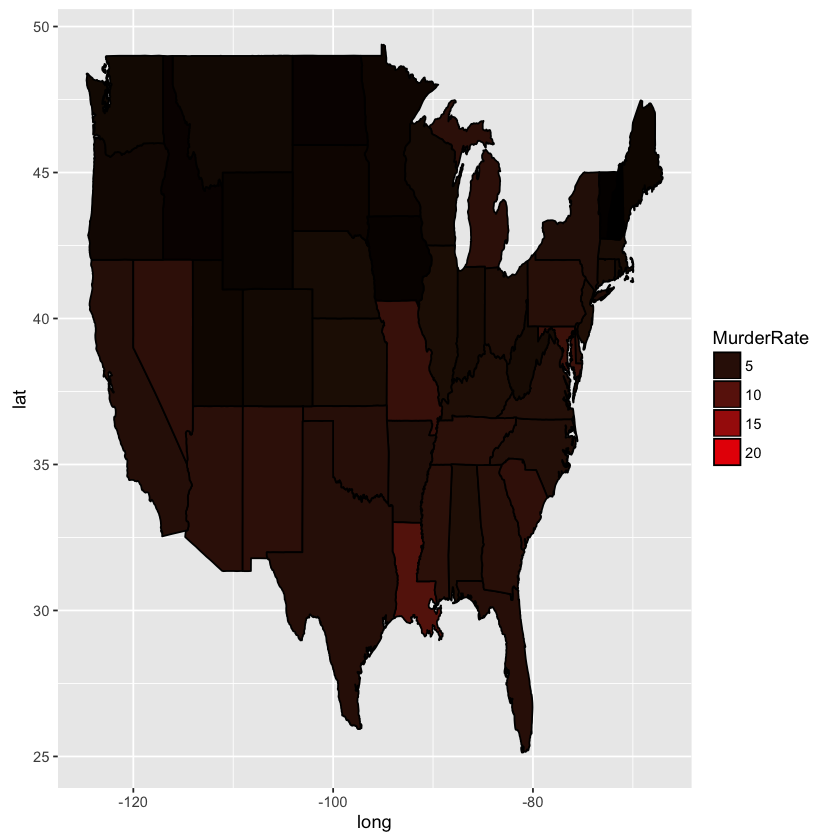

In [43]:

# Redo our plot with murder rate:
ggplot(murderMap, aes(x = long, y = lat, group = group, fill = MurderRate)) + geom_polygon(color = "black") + scale_fill_gradient(low = "black", high = "red", guide = "legend")


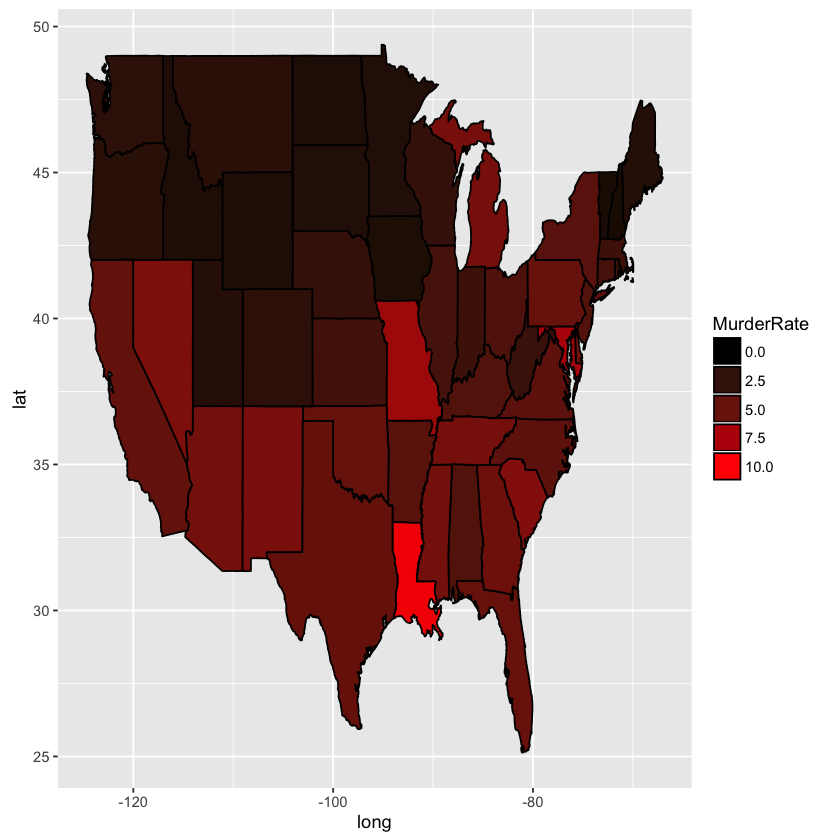

In [44]:
# Redo the plot, removing any states with murder rates above 10:
ggplot(murderMap, aes(x = long, y = lat, group = group, fill = MurderRate)) + geom_polygon(color = "black") + scale_fill_gradient(low = "black", high = "red", guide = "legend", limits = c(0,10))



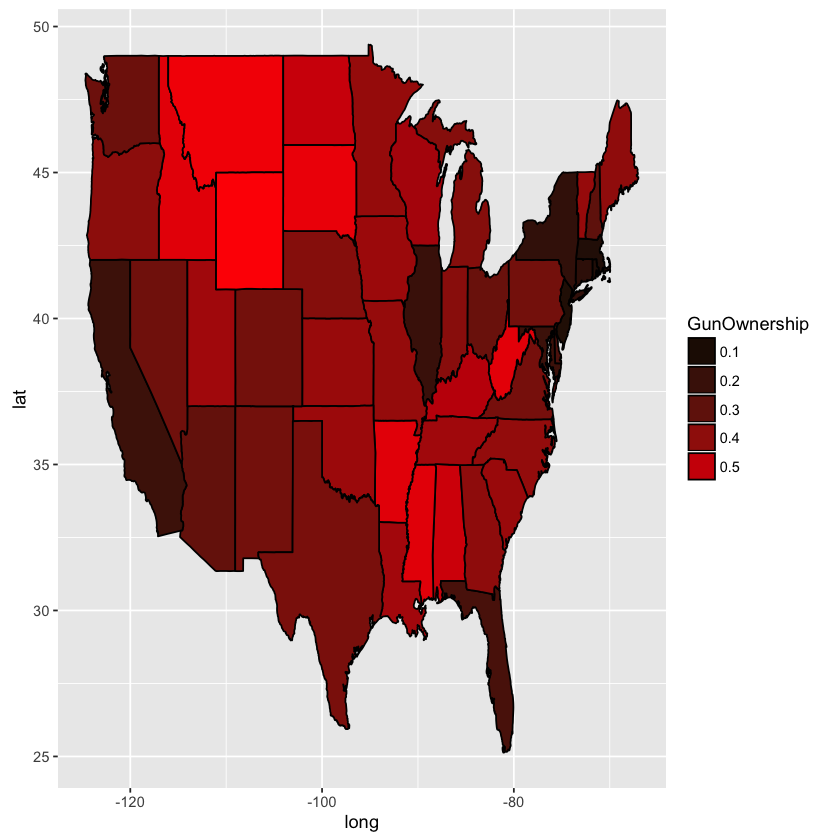

In [45]:
# Redo the plot, removing any states with murder rates above 10:
ggplot(murderMap, aes(x = long, y = lat, group = group, fill = GunOwnership)) + geom_polygon(color = "black") + scale_fill_gradient(low = "black", high = "red", guide = "legend")



In [46]:
str(murderMap)

'data.frame':	15537 obs. of  13 variables:
 $ region           : chr  "alabama" "alabama" "alabama" "alabama" ...
 $ long             : num  -87.5 -87.5 -87.5 -87.5 -87.6 ...
 $ lat              : num  30.4 30.4 30.4 30.3 30.3 ...
 $ group            : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ subregion        : chr  NA NA NA NA ...
 $ State            : Factor w/ 51 levels "Alabama","Alaska",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Population       : int  4779736 4779736 4779736 4779736 4779736 4779736 4779736 4779736 4779736 4779736 ...
 $ PopulationDensity: num  94.7 94.7 94.7 94.7 94.7 ...
 $ Murders          : int  199 199 199 199 199 199 199 199 199 199 ...
 $ GunMurders       : int  135 135 135 135 135 135 135 135 135 135 ...
 $ GunOwnership     : num  0.517 0.517 0.517 0.517 0.517 0.517 0.517 0.517 0.517 0.517 ...
 $ MurderRate       : num  4.16 4.16 4.16 4.16 4.16 ...


In [47]:
which.max(murderMap$GunOwnership)

[1] 15470

In [48]:
murderMap$State[15470]

[1] Wyoming
51 Levels: Alabama Alaska Arizona Arkansas California Colorado ... Wyoming